<a href="https://colab.research.google.com/github/chaserobertson/credit-fraud/blob/main/rf/rf_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_decision_forests
!pip install mealpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Restart the Google Colab connection after package install! CMD/Ctrl M

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/archive.zip creditcard.csv

Archive:  /content/drive/MyDrive/archive.zip
  inflating: creditcard.csv          


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
import mealpy

In [7]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
tf.random.set_seed(1234)

label = "Class"
class_weight = {0: 0.01, 1: 0.99}
metrics = ["Accuracy", "FalsePositives", "FalseNegatives", "Precision", "Recall"]

test_inds = np.random.rand(len(df)) < 0.2
train_df = df[~test_inds]
test_df = df[test_inds]

In [9]:
# convert pandas df to tensor ds
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label=label)

/usr/local/lib/python3.7/dist-packages/tensorflow_decision_forests/keras/core.py:2574: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features_dataframe = dataframe.drop(label, 1)


In [11]:
# create and fit default RF model
model = tfdf.keras.RandomForestModel(verbose=1)
model.compile(metrics=metrics)
model.fit(x=train_ds, class_weight=class_weight)

Use /tmp/tmpi3y_ka1v as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.018878. Found 227432 examples.
Training model...
Model trained in 0:02:11.429634
Compiling model...
Model compiled.


In [12]:
# OOB error during training
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=227432, accuracy=0.9729578479876433, loss=0.4197702886785083, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [13]:
# test error
evaluation = model.evaluate(test_ds, return_dict=True)

for k, v in evaluation.items():
    print(f"{k}: {v:.3f}")

58/58 [==============================] - 4s 44ms/step - loss: 0.0000e+00 - Accuracy: 0.9995 - false_positives: 5.0000 - false_negatives: 21.0000 - precision: 0.9490 - recall: 0.8158
loss: 0.000
Accuracy: 1.000
false_positives: 5.000
false_negatives: 21.000
precision: 0.949
recall: 0.816


In [14]:
model.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (30):
	Amount
	Time
	V1
	V10
	V11
	V12
	V13
	V14
	V15
	V16
	V17
	V18
	V19
	V2
	V20
	V21
	V22
	V23
	V24
	V25
	V26
	V27
	V28
	V3
	V4
	V5
	V6
	V7
	V8
	V9

Trained with weights

Variable Importance: MEAN_MIN_DEPTH:
    1.   "__LABEL"  8.952898 ################
    2. "__WEIGHTS"  8.952898 ################
    3.       "V24"  8.570051 ##############
    4.       "V13"  8.513359 ##############
    5.       "V25"  8.487494 ##############
    6.       "V22"  8.448890 ##############
    7.      "Time"  8.429406 ##############
    8.       "V15"  8.322754 ##############
    9.       "V23"  8.292769 ##############
   10.        "V6"  8.28

In [15]:
inspector.variable_importances()

{'MEAN_MIN_DEPTH': [("__LABEL" (4; #30), 8.952897634197216),
  ("__WEIGHTS" (1; #31), 8.952897634197216),
  ("V24" (1; #18), 8.57005122671057),
  ("V13" (1; #6), 8.513359197801837),
  ("V25" (1; #19), 8.487493967673414),
  ("V22" (1; #16), 8.44888956561053),
  ("Time" (1; #1), 8.429406060365448),
  ("V15" (1; #8), 8.322753726662043),
  ("V23" (1; #17), 8.29276857898507),
  ("V6" (1; #26), 8.289394211528778),
  ("V1" (1; #2), 8.253135272137504),
  ("V5" (1; #25), 8.221075589646995),
  ("V27" (1; #21), 8.195618508270481),
  ("V28" (1; #22), 8.185930354074436),
  ("V26" (1; #20), 8.174499153536116),
  ("V2" (1; #13), 8.15289049452022),
  ("V21" (1; #15), 8.074747893963044),
  ("V9" (1; #29), 8.015060091583681),
  ("Amount" (1; #0), 7.9939200479442265),
  ("V20" (1; #14), 7.959870618324658),
  ("V8" (1; #28), 7.84775101492937),
  ("V19" (1; #12), 7.807813255107104),
  ("V18" (1; #11), 7.683491278884862),
  ("V3" (1; #23), 7.5020394542013245),
  ("V16" (1; #9), 7.408040007735736),
  ("V7" (

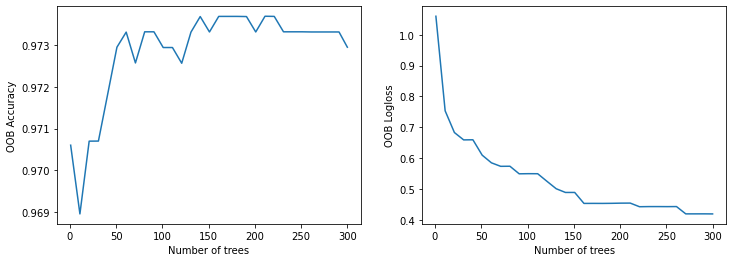

In [16]:
logs = inspector.training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB Accuracy")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("OOB Logloss")

plt.show()